
# Lab One: Exploring Table Data

### Dataset: Housing in London
Group: Benjamin Kuo & Nick Benso


### Business Understanding

This dataset is titled "Housing in London." It is a time-series dataset, and it was collected so that people such as real estate investors, the government, and home buyers can get an idea of the trends of home buying and home prices in London and the areas that surround it. This data is useful as discovering trends in the data will allow real estate investors to make better decisions on where to invest, the British and London government to better understand which communities are growing economically and socially and which aren't, and home buyers to make better decisions on buying a home that is safe, affordable, and will increase in value in the future. This data was collected primarily by the London government, which keeps a thorough and daily track on all the variables in the dataset. The primary prediction task will be to predict average price of houses sold in each area from the other variables. This will help primarily the third party of home buyers understand what areas are affordable for their budget and will be a good investment for their future. The third party of the London government will also benefit as the London government will get a better idea of the growth rate and current economic status of each area. This will allow the London government to get a better idea of which area's housing market is following the general inflation and economic trends of London and which areas are either getting too expensive or falling behind. The third party of real estate investors can also benefit from having this knowledge, as it will allow them to better understand which area's housing market is growing the quickest economically. Real estate investors can invest more into these areas in order to obtain the best possible returns. To be considered useful to these third parties, the prediction algorithm needs to perform well, but it does not need to perform near perfectly. Given the uses of this data, generally, a simple viewing of the graphs and charts presented may be sufficient to establish efficient and effective conclusions. There is not necessarily a big need for any mathematical calculations or regression models, but if we did decide to do a regression model, for instance, a regression equation that rejects the null hypothesis of no correlation between average price and another variable at alpha = .05 would be sufficient. The data does not involve any super serious or life-threatening matters, so it is not essential that the prediction perform super well or super accurate. This data is just primarily used as information to give the parties interested in the housing market an overview of the trends and opportunities in London's housing market in order to help narrow down their areas of interest. There are many other factors that these third parties should consider before making any decision, such as quality of life, general economic and global trends, etc. 

### Data Understanding

This dataset for housing in London on a monthly basis contains 13549 data entires involving 7 different attributes including: 
- date
- area
- average house price
- code
- houses sold
- number of crimes 
- flag indicating if city is a borough of London

Most of the data is numeric data and should be represented as floats. While the date feature can be used and compared as a string object type, it should be converted to a date data type for ease of use and readability. The area feature is a categorical attribute consisting of 45 different areas in London, meaning that it is nominal data. The code feature is a string object data type and should stay that way as it is a combination of letters and numbers. Lastly, the borough flag feature is a binary data type annd should be represented as a boolean, since it is a flag which is either true or false.


As the main goal is to predict the housing market for various locations in London, the main attributes of importance are: date, area, housing price, houses sold, and amount of crime. It is important to note that the code is essentially the area attribute but encoded so one of these can be removed, as it is easier to differentiate area names than area codes. Dates can be important as there may be seasonal swings in the housing market, where housing is higher in demand during certain seasons which can affect the prices as well as number sold. The housing prices and houses sold will be crucical to determining the housing market for certain areas and are the two possible target attributes. The amount of crime could also be informative, as it may affect public perception of the area and as a result affect prices changes and the number of houses sold. Lastly, the borough flag attribute could be important as it could indicate that the area is more well known or larger, which could potentially affect the overall statistics of the area, but this affect would likely be minimal.


In [24]:
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date

df = pd.read_csv('london_housing_monthly.csv') # read in the csv file
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
 6   borough_flag   13549 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 741.1+ KB
None


In [25]:
# separate data types
date_features = 'date'
bool_features = 'borough_flag'
numerical_features = ['average_price','houses_sold','no_of_crimes']
area_categories = df['area'].unique()

# define with correct data types
df[date_features] = df[date_features].astype(np.datetime64)
df[bool_features] = df[bool_features].astype(bool)
df[numerical_features] = df[numerical_features].astype(np.float64)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           13549 non-null  datetime64[ns]
 1   area           13549 non-null  object        
 2   average_price  13549 non-null  float64       
 3   code           13549 non-null  object        
 4   houses_sold    13455 non-null  float64       
 5   no_of_crimes   7439 non-null   float64       
 6   borough_flag   13549 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(3), object(2)
memory usage: 648.5+ KB


### Verify data quality


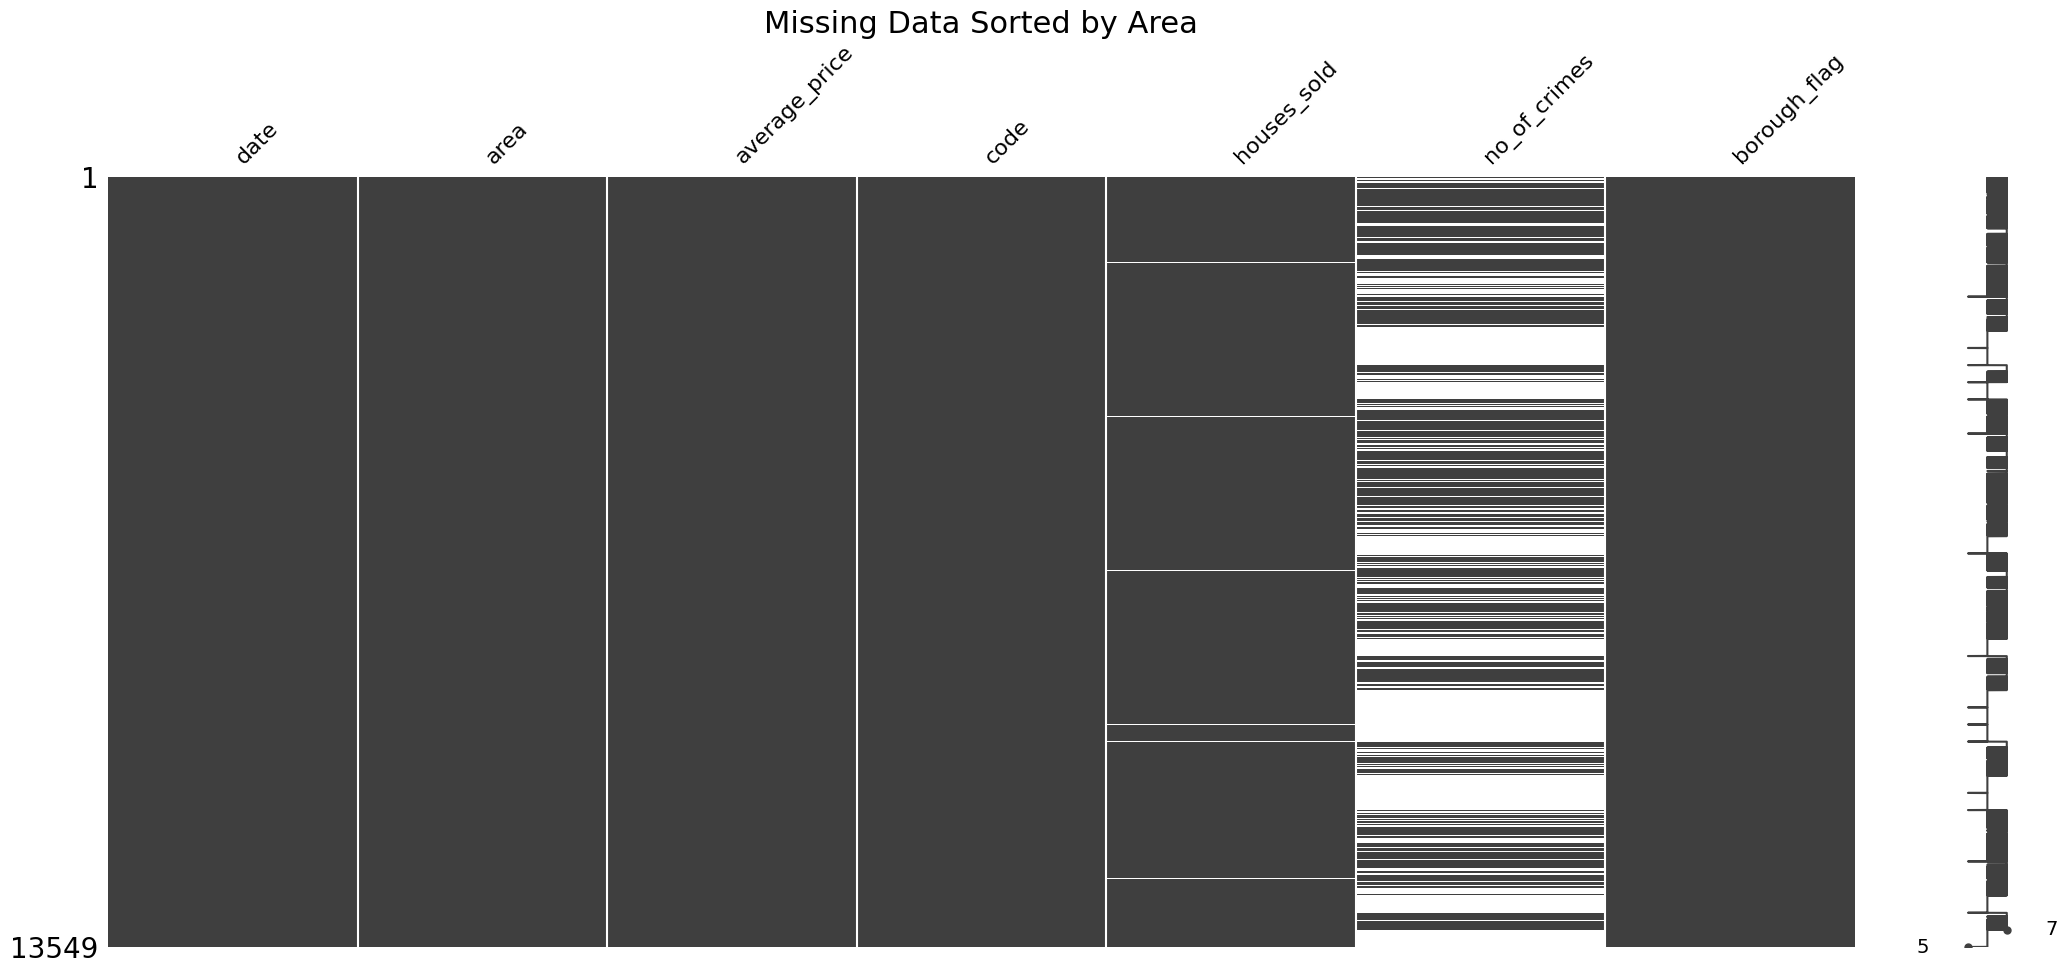

In [26]:
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)

import missingno as mn

mn.matrix(df.sort_values(by=["area","houses_sold"]))
plt.title("Missing Data Sorted by Area",fontsize=22)
plt.show()

Our dataset involves missing data in the number of crimes and houses sold features. It's likely that the missing houses sold data was from errors in data collection as that is an essential feature in analyzing housing data. While the number of crimes may be an important factor to the housing market, it doesn't immediately seem directly related and may have been left out in the data collection process for some areas. There is also a possibility that crimes is low in higher end neighborhoods, so the crime rate didn't seem relevant to those areas and as a result wasn't recorded.

### Data Cleaning

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9867 entries, 0 to 9935
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   area           9867 non-null   object        
 1   date           9867 non-null   datetime64[ns]
 2   average_price  9867 non-null   float64       
 3   no_of_crimes   9867 non-null   float64       
 4   borough_flag   9867 non-null   bool          
 5   houses_sold    9867 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(3), object(1)
memory usage: 472.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13455 entries, 0 to 13546
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           13455 non-null  datetime64[ns]
 1   area           13455 non-null  object        
 2   average_price  13455 non-null  float64       
 3   houses_sold    13455 non-null  float

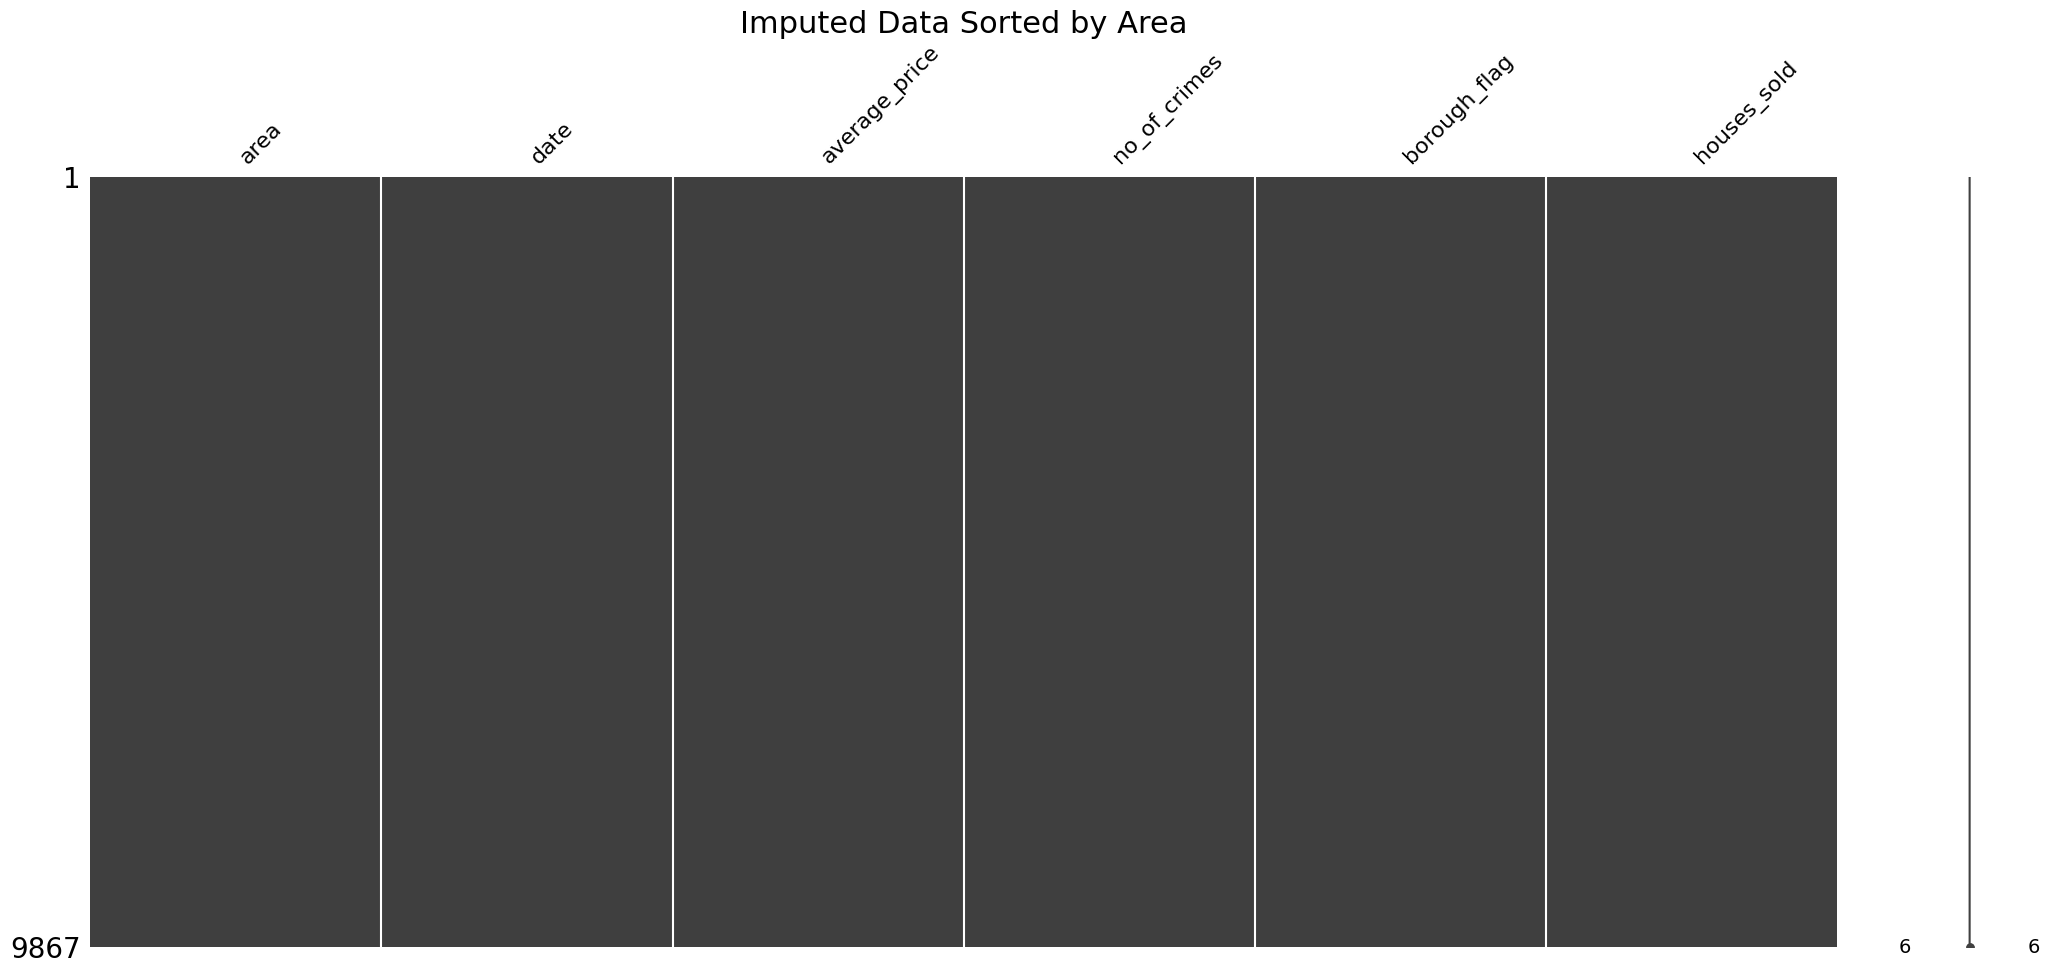

Data points lost: 3588


In [27]:
# Remove unimportant attributes
for col in ['code']:
    if col in df:
        del df[col]

# Remove missing data for houses sold
df.dropna(subset='houses_sold',inplace=True)

# Split, impute, combine for crime data, grouping by area
df_grouped = df.groupby(by=['area'])
func = lambda grp: grp.fillna(grp.mean()) # within groups, define function to fill using mean
df_imputed_sic = df_grouped[['average_price','no_of_crimes']].transform(func) # apply impute and transform the data back

# Extra step: fill any object columns that could not be transformed
col_deleted = list( set(df.columns) - set(df_imputed_sic.columns)) # in case the median operation deleted columns
df_imputed_sic[col_deleted] = df[col_deleted]

# drop any rows that still had missing values after grouped imputation
df_imputed_sic.dropna(inplace=True)

# 5. Rearrange the columns
df_imputed_sic = df_imputed_sic[['area','date','average_price','no_of_crimes','borough_flag','houses_sold']]
df_imputed_sic.info()

df.info()
mn.matrix(df_imputed_sic)
plt.title("Imputed Data Sorted by Area",fontsize=22)
plt.show()

print('Data points lost:', df.shape[0]-df_imputed_sic.shape[0])


In [28]:
df_imputed_sic.describe()

,average_price,no_of_crimes,houses_sold
count,9.867000e+03,9867.000000,9867.000000
mean,2.952333e+05,2123.338689,317.304145
std,1.983782e+05,920.494566,145.175810
min,5.046000e+04,0.000000,2.000000
25%,1.630525e+05,1588.000000,217.000000
50%,2.511370e+05,2125.000000,300.000000
75%,3.777365e+05,2568.000000,404.500000
max,1.463378e+06,7227.000000,1073.000000


Due to how important crime data could be to predictions, we decided to impute the data by grouping by area then filling in with the area's average number of crimes. However, we have to note that crime info was only avaliable for about half the data, which means our confidence in the analysis of crime data will be low but may still capture interesting correlations. 

Since we have missing data in the houses sold, it would be a bad idea to impute this data if we decide to choose this feature as our target data. This is because we would essentially be partially training the algorithm with our guesses. For this case, it would be better to just remove the data entires with missing data, as it was a small portion of the dataset. Another solution could be to choose average prices as the target data and impute the houses sold by grouping the data by area then filling in missing data with the area's mean houses sold. As we are using houses sold as our target feature, we decided to remove those missing data points.

The cleaning of the data resulted in losing 3588 data points out of the original 13455.

### Data Visualization

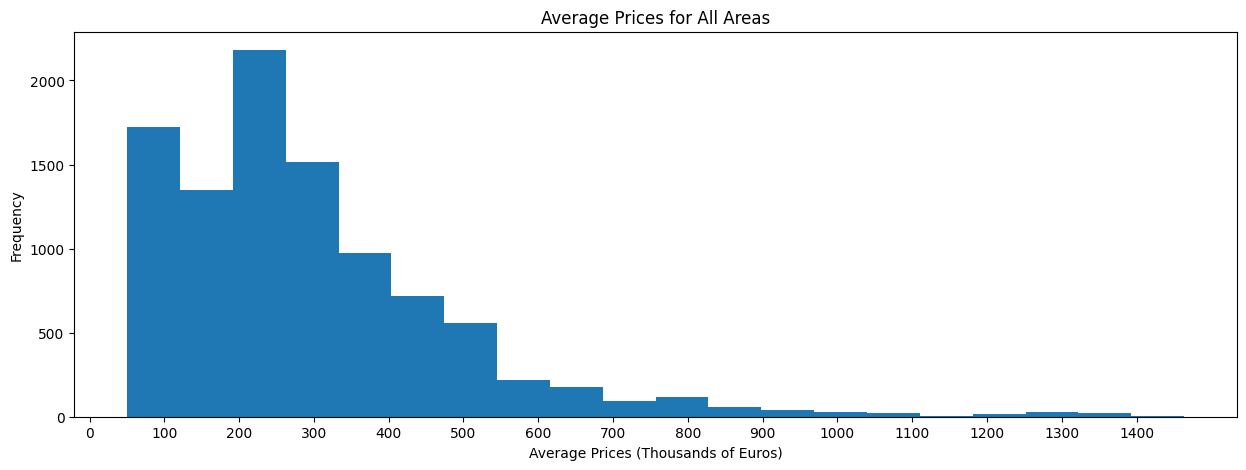

Max:  1463378.0 Min:  50460.0 Range:  1412918.0


In [29]:
fig = plt.figure(figsize=(15,5))

(df_imputed_sic.average_price/1000).plot.hist(bins=20)
plt.xticks(np.arange(0, 1500, 100))
plt.xlabel('Average Prices (Thousands of Euros)')
plt.title('Average Prices for All Areas')
plt.ticklabel_format(style='plain')
plt.show()

print('Max: ', df_imputed_sic.average_price.max(), 'Min: ', df_imputed_sic.average_price.min(), 'Range: ', df_imputed_sic.average_price.max()-df_imputed_sic.average_price.min())

This histogram shows the spread of average housing prices across all the housing areas in London. The majority of prices range from 50-300k Euros with one peak around the 50-100k mark and the other around the 200-300k mark. Additionally, we see that the data has a maximum average price of 1.46 Million Euros which leads to a large range of around 1.41 Million. 

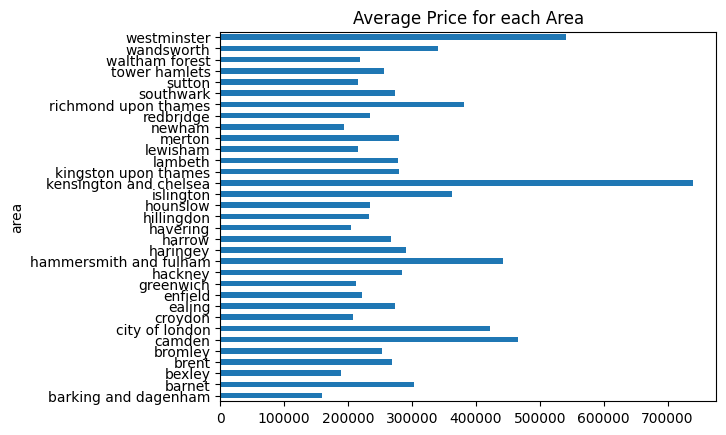

In [30]:
df_grouped = df_imputed_sic.groupby(by='area')
total_average_price = df_grouped.average_price.sum() / df_grouped.average_price.count()
ax = total_average_price.plot(kind='barh')
plt.title('Average Price for each Area')
plt.show()

This bar chart shows the average price of a house in each area since 1995. The areas with the most expensive houses include kensinton and chelsea, westminster, hammersmith and fullnam, the city of london, and camden. The least expensive areas include newham, lewisham, hillingdon, hackney, croydon, bexley, and barking and dagenham. It's important to note that the gap between the least expensive areas and the overall average (295k Euros) are much smaller than the gap with the most expensive areas. Therefore, house buyers can look at this data to help better decide which areas align with their budget requirements, and real estate investors can use this data to decide which areas have the most and least expensive investments. This data is limited mainly to the fact that it does not adjust for inflation. 

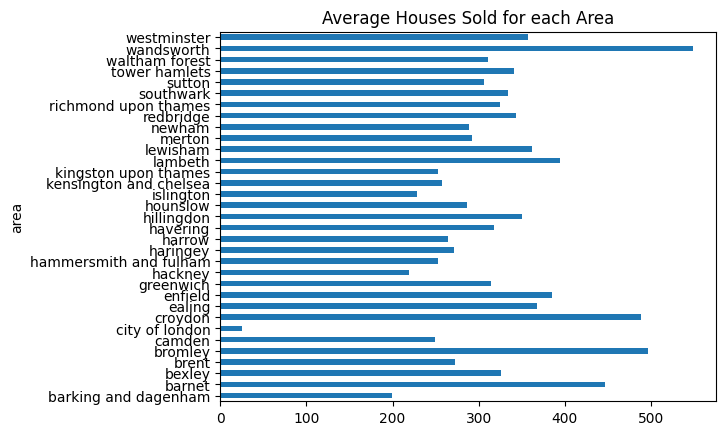

In [31]:
average_houses_sold = df_grouped.houses_sold.sum() / df_grouped.houses_sold.count()
ax = average_houses_sold.plot(kind='barh')
plt.title('Average Houses Sold for each Area')
plt.show()

This bar chart shows the average number of houses sold in each area since 1995. The areas with the most houses sold are wandsworth, croydon, camden, and barnet. The areas with the least number of houses sold are islington, hackney, the city of london, and barking and dagenham. Therefore, someone looking to buy a house could look at the areas with the most houses sold in order to increase their chances of finding a house. Real estate investors could also look into these areas in order to increase the odds they find a house to invest in. This data does not take into account the land size of each area. 

Text(0.5, 1.0, 'Houses Sold Boxplot Grouped by Area')

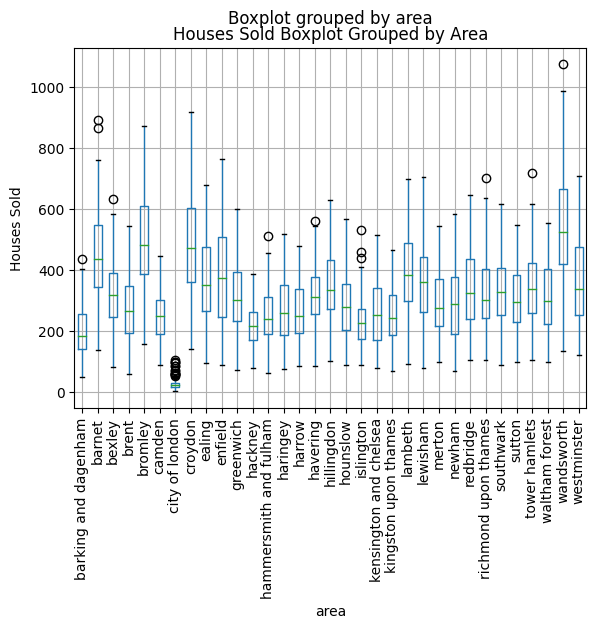

In [32]:
ax = df_imputed_sic.boxplot(column='houses_sold', by = 'area') # group by class
plt.ylabel('Houses Sold')
plt.xticks(rotation=90)
plt.title('Houses Sold Boxplot Grouped by Area')
#ax.set_yscale('log')

From this boxplot we can see that the "city of london" area seems like an outlier as well as it lacking an actual specfic name. Due to this we will ignore this data point in the following analyses. Places like wandsworth, barnet, and croydon have the biggest range in number of houses sold, showing that these places have been more dynamic in their houses sold since 1995. This means that either the land size is larger in these areas or that there was a housing boom in these areas.

In [33]:
# Remove "city of london" data
df_imputed_sic = df_imputed_sic.loc[df["area"] != "city of london" ]
df_grouped = df_imputed_sic.groupby(by='area')

Text(0.5, 1.0, 'Average Price Boxplot Grouped by Area')

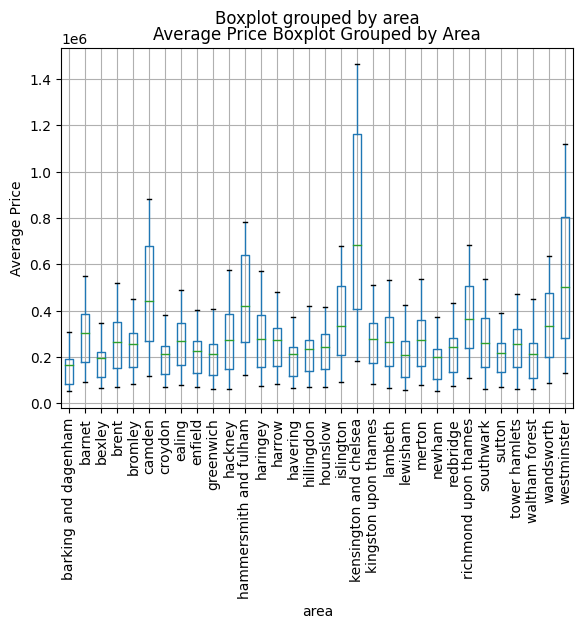

In [34]:
ax = df_imputed_sic.boxplot(column='average_price', by = 'area') # group by class
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.title('Average Price Boxplot Grouped by Area')
#ax.set_yscale('log')

This boxplot provides boxplots of the average price for each area from 1995 to 2020. From the boxplot, we can gather that camden, kensinton and chelsea, and westminster have the biggest range in the prices of their houses, thus making buying or investing in houses in these areas more risky. 

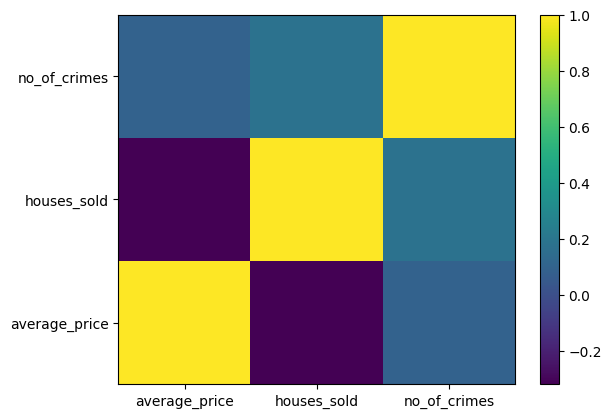

In [35]:
# plot the correlation matrix 
vars_to_use = ['average_price', 'houses_sold', 'no_of_crimes'] # pick vars
plt.pcolor(df_imputed_sic[vars_to_use].corr()) # do the feature correlation plot

# fill in the indices
plt.yticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.xticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.colorbar()
plt.show()

### Question: What variable greatest affects the average price of houses sold in an area?

According to the correlarion matrix above, the variable that affects the average price of houses the most is the number of houses sold. It appears that there is a slight negative correlation between the average price and the number of houses sold. This may likely be because as houses become more expensive, less people can afford the houses, thus causing less houses overall to be bought. Additionally, according to the correlation matrix, it seems that the number of crimes do not affect the average price of a house, which seems suprising as it would be expected that as the number of crimes increase, the average price of a house decreases. Therefore, home buyers and real estate investors should consider mostly the number of houses being sold in an area to better the understand the prices of the houses in that area. When determining solely the price, the third parties should not consider the number of crimes or assume that the number of crimes will greatly decrease the prices of houses. 

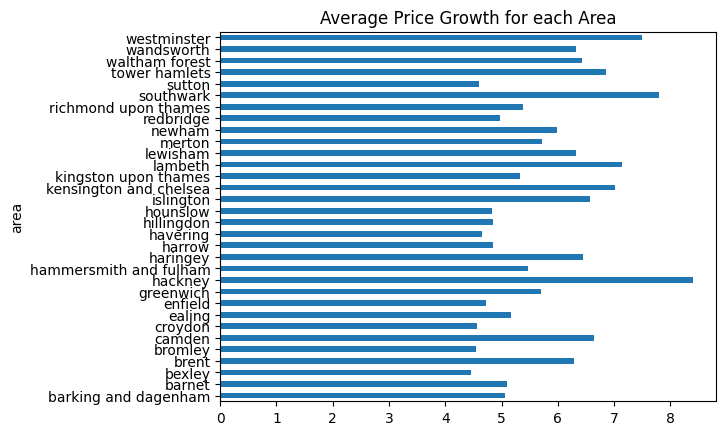

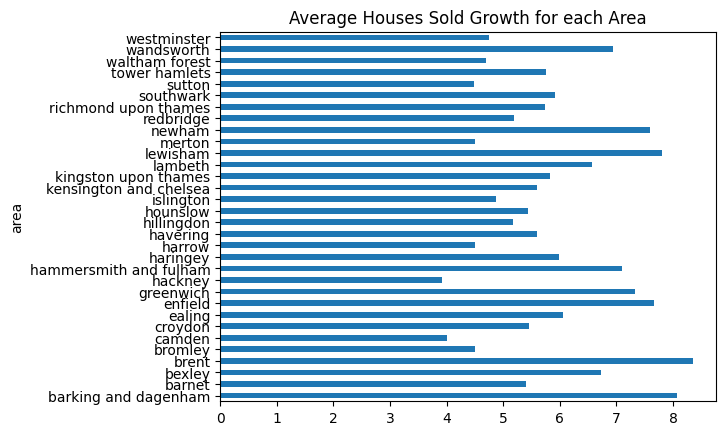

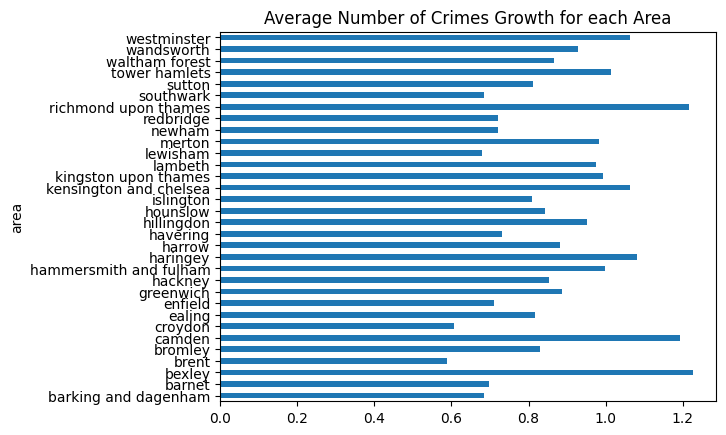

In [43]:

average_price_growth = (df_grouped.max(date).average_price - df_grouped.min(date).average_price) / df_grouped.min(date).average_price
ax = average_price_growth.plot(kind='barh')
plt.title('Average Price Growth for each Area')
plt.show()

average_houses_sold_growth = (df_grouped.max(date).houses_sold - df_grouped.min(date).houses_sold) / df_grouped.min(date).houses_sold
ax = average_houses_sold_growth.plot(kind='barh')
plt.title('Average Houses Sold Growth for each Area')
plt.show()

average_no_of_crimes_growth = (df_grouped.max(date).no_of_crimes - df_grouped.min(date).no_of_crimes) / df_grouped.min(date).no_of_crimes
ax = average_no_of_crimes_growth.plot(kind='barh')
plt.title('Average Number of Crimes Growth for each Area')
plt.show()

### Question: Which areas would be best to live in for the future?

Accoring to the "Average Price Growth for each Area" graph, we can get an understanding for which areas are increasing their housing prices the most. Areas such as westminister, southwark, and hackney have seen the greastest price increase from 1995 to 2020. This means that for home buyers and real estate investors, these places might be strong candidates to look at because this data may suggest that the houses will continue to significantly increase in value after being purchased. In the "Average Houses Sold Growth for each Area" graph, places like lewisham, enfield, brent, and barking and dagenham stick out as areas that has been rapidly increasing in the number of houses sold from 1995 to 2020. If a home buyer is looking for a place that is also rapidly growing in population, then these places may be strong candidates. From the "Average Number of Crimes Growth for each Area" graph, we see that places such as westminister, richmond upon thames, camden, and bexley have seen the most increase in crimes. We know from the correlation matrix that the number of crimes does not impact the price of houses, so third parties should not be concerned about the impact of crime increase when looking at the price of houses in each area. However, this data may be important in case an increase in crime is a personal problem for third parties. Additionally, from the 'Average Price Boxplot Grouped by Area' graph, we notice that places like camden, kensinton and chelsea, and westminster have the highest average house price but also have the largest variance and range in house prices. This means that for home buyers and real estate investors, these places will be much more risky. Therefore, to avoid large risk, third parties should focus on places such as bexley, croydon, havering, and sutton which all have a very small variance and range, and thus, a small risk. 

Text(0, 0.5, 'Average Prices (Euros)')

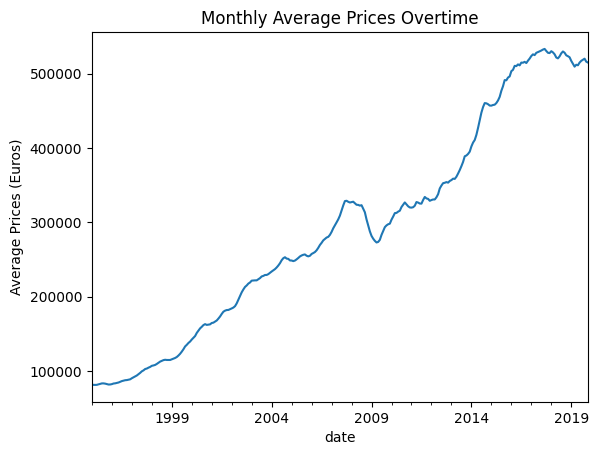

In [39]:
df_grouped2 = df_imputed_sic.groupby(by='date')
monthly_average_price = df_grouped2.average_price.sum() / df_grouped2.average_price.count()
lines = monthly_average_price.plot.line()
plt.title("Monthly Average Prices Overtime")
plt.ylabel('Average Prices (Euros)')


Text(0, 0.5, 'Number of Houses Sold')

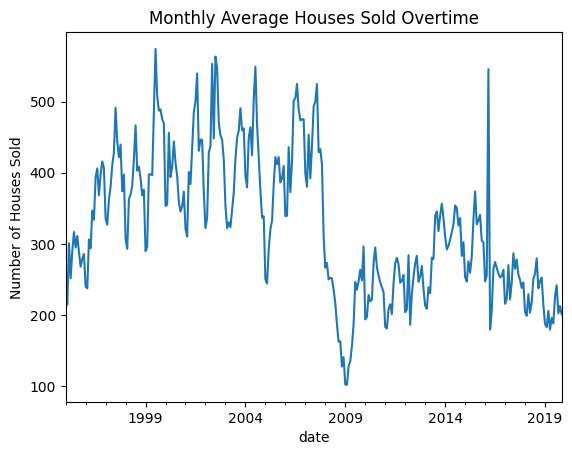

In [40]:
monthly_average_houses_sold = df_grouped2.houses_sold.sum() / df_grouped2.houses_sold.count()
lines = monthly_average_houses_sold.plot.line()
plt.title("Monthly Average Houses Sold Overtime")
plt.ylabel('Number of Houses Sold')

Looking at the graph we can clearly see seasonal variation in the number of houses sold, meaning we should take a closer look more detailed dates. Additionally, we can also see the affect the recession in 2008 had on housing, as the houses sold drops to only around 100 in 2009.

Text(0, 0.5, 'Number of Houses Sold')

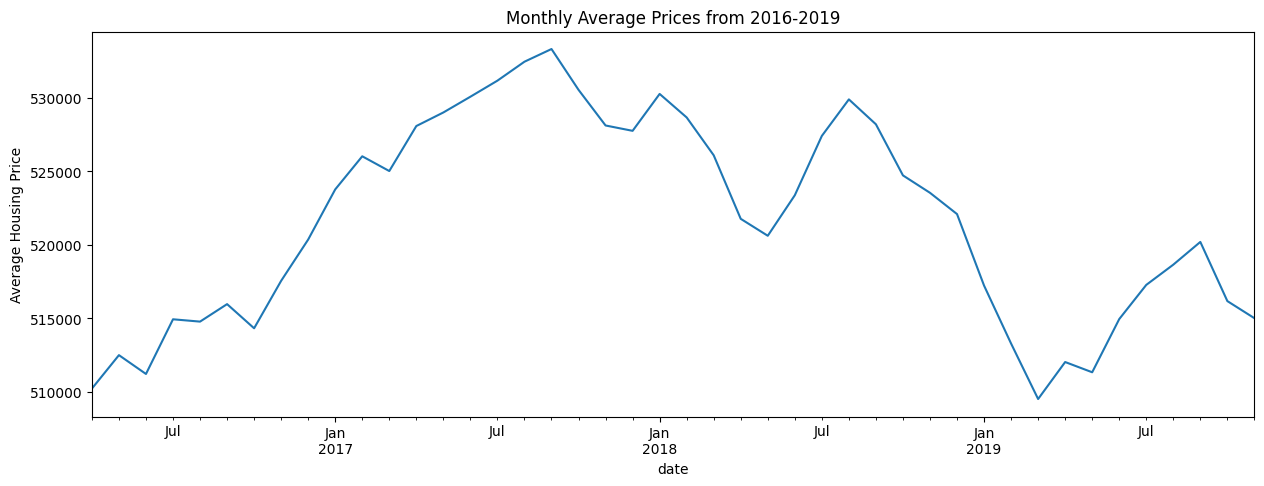

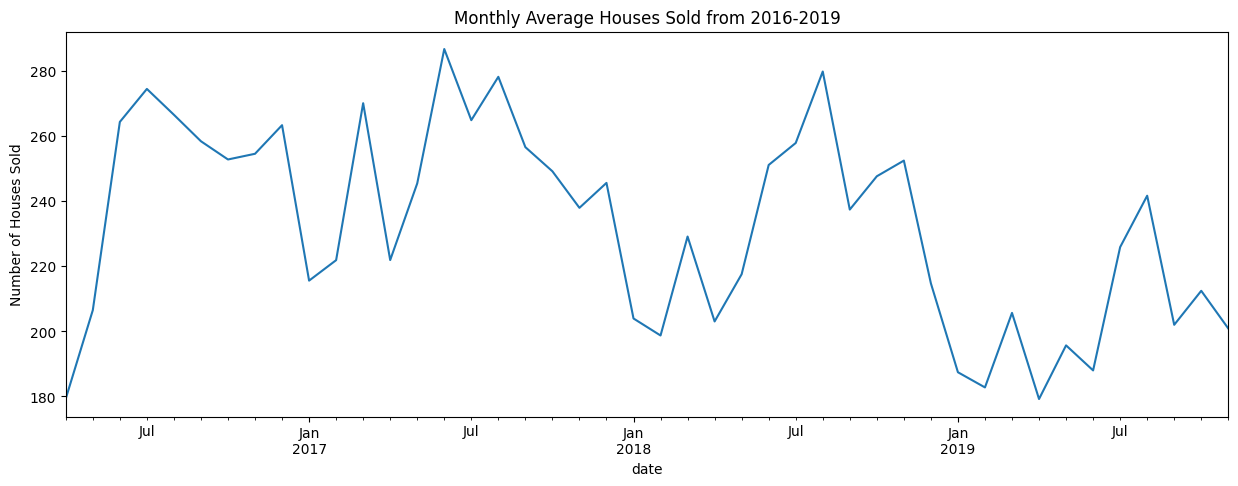

In [41]:
plt.figure(figsize=(15,5))
lines = monthly_average_price[255:].plot.line()
plt.title("Monthly Average Prices from 2016-2019")
plt.ylabel('Average Housing Price')

plt.figure(figsize=(15,5))
lines = monthly_average_houses_sold[255:].plot.line()
plt.title("Monthly Average Houses Sold from 2016-2019")
plt.ylabel('Number of Houses Sold')

Looking at the zoomed in graph of monthly average house prices for 2016 - 2019 we see that there is no clear trend between the prices and the seasons of the year, indicating that prices don't change relative to the time of year. Looking at the zoomed in graph of monthly average houses sold, however, we see that there is a clear trend in houses sold with the specific time of year. Selling/buying houses seems most popular in the summer months starting from June up until January where there is a sudden drop, then followed by a short peak between February and March, then decreasing again until the summer. This makes sense as the summer is a popular time to get married and as a result a large number of new couples buy their new shared houses around that time.

### Question: Is now even a good time to buy a house?

The monthly average price time series graph shows a general positive trend in the price of houses. However, starting around 2016, it appears to flatten and eventually decreases slightly. Therefore, it may be wise for home buyers to wait until the trend starts increasing again to buy a house. That way, home buyers can ensure that their house continues to increase in value after they have bought it. This may also give real estate investors a caution before investing in real estate to ensure that they do not create a loss. This data may be useful to the london government, as it may provide valuable incentive for the london government to start exploring variables that may have caused this flatlining of housing prices to occur. The monthly average houses sold further supports how currently, many potential home buyers have not bought homes recently. It seems that the economy is still recovering from the 2008 global recession, and that it will still take longer for the monthly average houses sold to recover to the level it was at before the recession. Therefore, many potential home buyers have already came to the conclusion that now is not the best time to purchase a home. Because of these graphs, it is evident that investing or purchasing a home may not be good decision at the moment until the housing market fully recovers. However, if they do plan on getting homes, it is important to note that the summer months are the most popular for housing so if planning to buy during the summer buyers should prepare research ahead of time before most listings are taken down.


### References:

Dataset: https://www.kaggle.com/datasets/justinas/housing-in-london?resource=download
  
  Code Examples: Data Visualization notebook from Eric Larson